In [1]:
from lcapy import Circuit, t, pi, sin, cos

In [2]:
from IPython.display import Math, display
from matplotlib import style
from matplotlib.pyplot import savefig
#style.use('fivethirtyeight')
style.use('ggplot')
%matplotlib inline

### Circuito en el dominio del tiempo

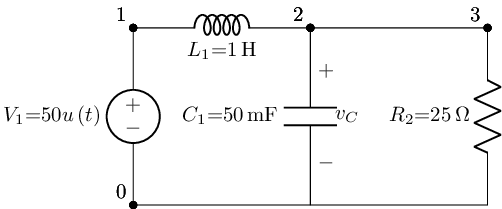

In [3]:
cct = Circuit("""
V1 1 0 {50*u(t)}; down
R2 3 0_2 25; down=1.5
C1 2 0_1 50e-3 -100; down, v=v_C
L1 1 2 1 0; right=1.5
W 2 3; right=1.5
W 0 0_1; right
W 0_1 0_2; right
""")
cct.draw()

### Circuito equivalente de Laplace

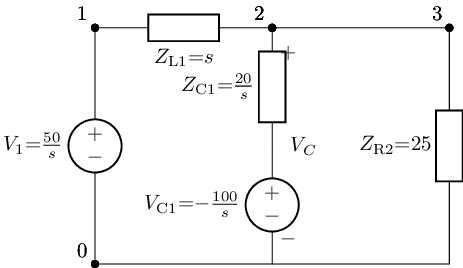

In [4]:
cct.s_model().draw()

### $V_C(s)$ (Calculado por el solver)

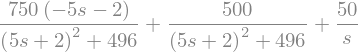

In [5]:
cct.C1.v.LT().simplify_terms()

### Desarrollando como hicimos en clase:

$$ V_C(s) = \frac{A}{s} + B \cdot \frac{(s + 0,4)}{(s + 0,4)^2 + 4.454^2} + C \cdot \frac{4.454}{(s + 0,4)^2 + 4.454^2} $$

Para calcular $A$:

\begin{align}
A &= \lim\limits_{s \to 0}\frac{1000-100s}{s^2+\frac{4}{5}s+20} \\
A &= 50
\end{align}

Cálculo de $C$:

\begin{align}
\left. \frac{1000-100s^2}{s \cdot\left(s^2+\frac{4}{5}s+20)\right)}\right|_{s=-0,4} &=  \left. \frac{50}{s} +  C \cdot \frac{4.454}{(s - 0,4)^2 + 4,454^2}\right|_{s=-0,4}\\
\frac{1000-100\cdot (-0,4)^2}{-0,4 \cdot\left((-0,4)^2+0,8\cdot(-0,4)+20\right)} &= \frac{50}{-0,4} +  C \cdot \frac{4,454}{4,454^2}\\
\frac{1000-16}{-0,4 \cdot\left(0,16-0.32+20\right)} &= -125 +  C \cdot \frac{4,454}{4,454^2}
\end{align}

\begin{align}
C &= (-123,992+125)\cdot 4,454 \\
C &= 4,49
\end{align}

Cálculo de $B$:

\begin{align}
\left. \frac{1000-100s^2}{s \cdot\left(s^2+\frac{4}{5}s+20)\right)}\right|_{s=0,6} &=  \left. \frac{50}{s} + B \cdot \frac{(s + 0,4)}{(s + 0,4)^2 + 4,454^2} + 4,49 \cdot \frac{4,454}{(s + 0,4)^2 + 4,454^2}\right|_{s=0,6}\\
\frac{1000-100\cdot (0,6)^2}{0,6 \cdot\left(0,6^2+0,8\cdot 0,6+20\right)} &= \frac{50}{0,6} + B \cdot \frac{1}{1 + 4,454^2} + 4,49 \cdot \frac{4,454}{1 + 4,454^2}\\
\frac{1000-36}{0,6 \cdot\left(0,36+0,48+20\right)} &= 83,333 + B \cdot \frac{1}{20,838} + 4,49 \cdot \frac{4,454}{ 20,838}
\end{align}

\begin{align}
B &= (77,095 - 83,333 - 0,9597 )\cdot 20,838 \\
B &= -149,99 \\ 
B &\approx -150
\end{align}

Luego:

$$ V_C(s) = \frac{50}{s} - 150 \cdot \frac{(s - 0,4)}{(s - 0,4)^2 + 4.454^2} + 4.49 \cdot \frac{4.454}{(s - 0,4)^2 + 4.454^2} $$

### $v_C(t)$

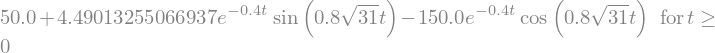

In [11]:
cct.C1.v.evalf()

In [14]:
(4.49013255066937*sin(4.454*t)-150*cos(4.454*t)).simplify_sin_cos().evalf()

### Gráfica

<AxesSubplot:xlabel='Time (s)', ylabel='Voltage (V)'>

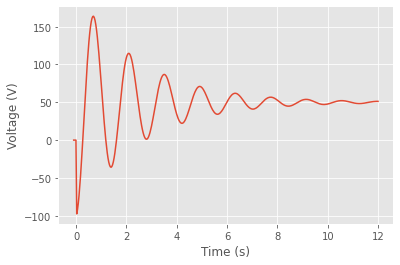

In [7]:
cct.C1.v.force_causal().plot((-0.1, 12))